# **Download from Drive**

---



In [1]:
!gdown --id '1WZ8JNwkWJ1kFSGAoRHM6VkSOKuk9EFnr'

Downloading...
From: https://drive.google.com/uc?id=1WZ8JNwkWJ1kFSGAoRHM6VkSOKuk9EFnr
To: /content/Dataset_C.zip
162MB [00:03, 45.3MB/s]


# **Unzip**

---



In [2]:
!unzip '/content/Dataset_C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

# **Remove Zip**

---



In [3]:
!rm '/content/Dataset_C.zip'
print("removed")

removed


# **Imports**

---



In [4]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
!pip install torchviz
from torchviz import make_dot
import PIL
import random
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=3f3fff1c5ac34d7393001301199a6cbee8c563e34fec927bedbd063953fa3aef
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [5]:
df = pd.read_csv("training-c.csv")
df = df.loc[:, ['filename','digit']]

# **Data Preprocessing**

---



In [6]:
class processDataset(Dataset):

    def __init__(self, root, image_dir, csv_file, transform=None):
        self.root = root
        self.image_dir = image_dir
        self.image_files = csv_file.iloc[:, 0]
        self.data = csv_file.iloc[:, 1]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_name = os.path.join(self.image_dir, self.image_files[index])
        image = PIL.Image.open(image_name)
        label = self.data[index]
        if self.transform:
            image = self.transform(image)
        return (image, label)

In [7]:
root = Path(os.getcwd())
image_dir = root/'training-c'
csv_file = df
mean = [0.5,]
std = [0.5, ]
transform_img = transforms.Compose([
                            # transforms.Grayscale(),
                            transforms.Resize(28),
                            transforms.ToTensor(),
                            transforms.Normalize(mean, std)
])

In [8]:
dset = processDataset(root, image_dir, csv_file, transform= transform_img)
dset_size = len(dset)
test_perc = 20
test_size = int(dset_size * (test_perc/100))
train_size = dset_size - test_size
train_dataset, test_dataset = torch.utils.data.random_split(dset, [train_size, test_size])
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [9]:
print(dset_size, test_size, train_size)

24298 4859 19439


# **Data Visualization**

---



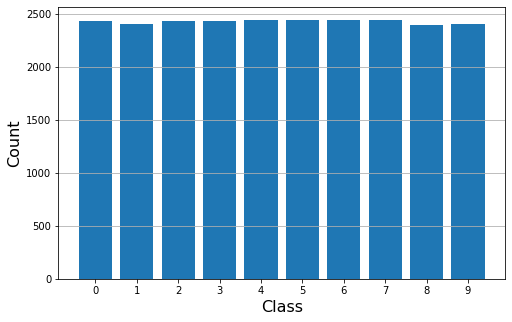

In [10]:
df1 = pd.read_csv("training-c.csv")
plt.rcParams['figure.figsize'] = (8, 5)
plt.bar(df1['digit'].value_counts().index, df1['digit'].value_counts())
plt.xticks(np.arange(10))
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid('on', axis='y')

Label: 8
Label: 5
Label: 4
Label: 3
Label: 4
Label: 7
Label: 2
Label: 0


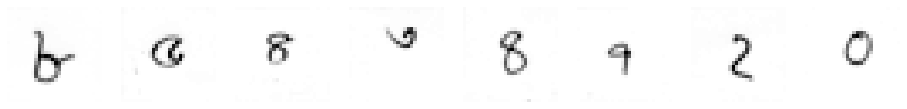

In [11]:
def get_image(image, label, dataset):
    print(f"Label: {label}")
    image = image.permute(1,2,0)
    image = image[:,:,0]
    # plt.imshow(image,cmap='gray')
    # plt.show()
    return image
plt.rcParams['figure.figsize'] = (16, 2)
for i in range(1,9):
  img = get_image(*train_dataset[i], train_dataset)
  plt.subplot(1, 8, i)
  plt.axis('off')
  plt.imshow(img,cmap='gray')
plt.show()

# **EXP_02_trial_1**

---



In [ ]:
# Hyperparameters
batch_size = 200
num_iters = 20000
input_dim = 28*28
output_dim = 10
learning_rate = 0.01

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 700)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(700, 500)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(500, 400)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(400, 200)
        self.relu_4 = nn.ReLU()

        # self.linear_5 = nn.Linear(300, 200)
        # self.relu_5 = nn.ReLU()

        # self.linear_6 = nn.Linear(200, 100)
        # self.relu_6 = nn.ReLU()

        self.linear_out = nn.Linear(200, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)

        # out  = self.linear_5(out)
        # out = self.relu_5(out)

        # out  = self.linear_6(out)
        # out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 3.7898683547973633. Accuracy: 9.796254373327844
Iteration: 1000. Loss: 3.6795403957366943. Accuracy: 9.096521918090142
Iteration: 1500. Loss: 3.7743518352508545. Accuracy: 10.866433422514922
Iteration: 2000. Loss: 3.7092466354370117. Accuracy: 14.653220827330726
Iteration: 2500. Loss: 3.9839327335357666. Accuracy: 21.012554023461618
Iteration: 3000. Loss: 3.3832898139953613. Accuracy: 14.591479728339165
Iteration: 3500. Loss: 3.4934616088867188. Accuracy: 17.431570281951018
Iteration: 4000. Loss: 3.753586530685425. Accuracy: 19.139740687384236
Iteration: 4500. Loss: 3.703922986984253. Accuracy: 20.251080469232352
Iteration: 5000. Loss: 3.4660274982452393. Accuracy: 17.637373945256225
Iteration: 5500. Loss: 3.3617868423461914. Accuracy: 24.305412636344926
Iteration: 6000. Loss: 3.150181770324707. Accuracy: 25.519654249845647
Iteration: 6500. Loss: 3.345141649246216. Accuracy: 24.490635933319613
Iteration: 7000. Loss: 3.3350954055786133. Accuracy: 25.08746655690471


# **EXP_02_trial_2**

---



In [ ]:
# Hyperparameters
batch_size = 32
num_iters = 150000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(128, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 2.618775964746064. Valid_Loss: 3.133240956586927. Accuracy: 12.36880016464293
***Validation loss decreased (9999999.000000 --> 3.133241). Saving model ...***
Iteration: 1000. Train_Loss: 2.006842133169637. Valid_Loss: 3.0791643841027674. Accuracy: 15.105988886602182
***Validation loss decreased (3.133241 --> 3.079164). Saving model ...***
Iteration: 1500. Train_Loss: 1.414258271150674. Valid_Loss: 2.9998785896442586. Accuracy: 20.004116073266104
***Validation loss decreased (3.079164 --> 2.999879). Saving model ...***
Iteration: 2000. Train_Loss: 0.8464633924577565. Valid_Loss: 2.956660393212258. Accuracy: 20.78616999382589
***Validation loss decreased (2.999879 --> 2.956660). Saving model ...***
Iteration: 2500. Train_Loss: 0.3161769607711141. Valid_Loss: 2.8885545652082953. Accuracy: 26.48693146738012
***Validation loss decreased (2.956660 --> 2.888555). Saving model ...***
Iteration: 3000. Train_Loss: 2.350644736095103. Valid_Loss: 2.8406680541445315. Acc

## **Loss Graph**

---



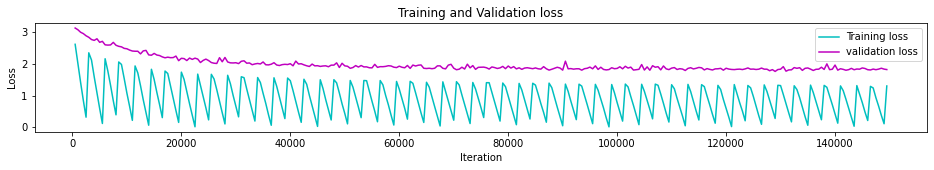

In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Accuracy Graph**

---



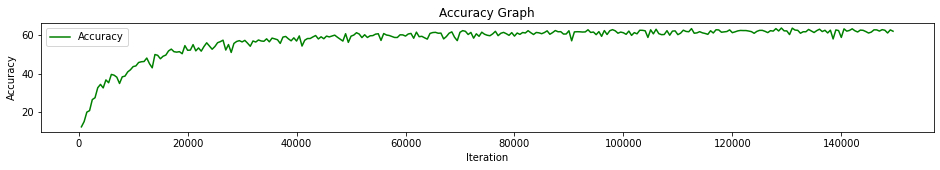

In [ ]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Model Visualization**

---



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(28*28, 512))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W3', nn.Linear(512, 256))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W4', nn.Linear(256, 128))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W5', nn.Linear(128, 10))
model1.add_module('ReLU', nn.ReLU())


xx = torch.randn(32,784)
yy = model1(xx)


make_dot(yy.mean(), params=dict(model1.named_parameters())).render("model2", format="png")

'model2.png'

# **EXP_02_trial_3**

---



In [ ]:
# Hyperparameters
batch_size = 32
num_iters = 125000
input_dim = 28*28
output_dim = 10
learning_rate = 0.0001

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(128, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 3.2457388518701533. Valid_Loss: 3.90863379609759. Accuracy: 11.236880016464292
***Validation loss decreased (9999999.000000 --> 3.908634). Saving model ...***
Iteration: 1000. Train_Loss: 2.5146400196156486. Valid_Loss: 3.894299827158807. Accuracy: 17.266927351306855
***Validation loss decreased (3.908634 --> 3.894300). Saving model ...***
Iteration: 1500. Train_Loss: 1.8158141180862952. Valid_Loss: 3.8639148935709353. Accuracy: 16.60835562873019
***Validation loss decreased (3.894300 --> 3.863915). Saving model ...***
Iteration: 2000. Train_Loss: 1.105693767882588. Valid_Loss: 3.839115955182421. Accuracy: 19.05741922206215
***Validation loss decreased (3.863915 --> 3.839116). Saving model ...***
Iteration: 2500. Train_Loss: 0.4274390107951627. Valid_Loss: 3.8035845919434585. Accuracy: 21.03313438979214
***Validation loss decreased (3.839116 --> 3.803585). Saving model ...***
Iteration: 3000. Train_Loss: 3.106236976254222. Valid_Loss: 3.7792979810810663. Acc

## **Loss Graph**

---



In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Accuracy Graph**

---



In [ ]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Model Visualization**

---



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(28*28, 512))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W1', nn.Linear(512, 256))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W2', nn.Linear(256, 128))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W3', nn.Linear(128, 10))
model1.add_module('ReLU', nn.ReLU())


xx = torch.randn(32,784)
yy = model1(xx)

make_dot(yy.mean(), params=dict(model1.named_parameters()))

# **EXP_02_trial_4**

---



In [ ]:
# Hyperparameters
batch_size = 32
num_iters = 120000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 128)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(128, 32)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 2.3235960616527733. Valid_Loss: 2.783899298222572. Accuracy: 10.351924264251904
***Validation loss decreased (9999999.000000 --> 2.783899). Saving model ...***
Iteration: 1000. Train_Loss: 1.749626609056144. Valid_Loss: 2.584458541762169. Accuracy: 10.393084996912945
***Validation loss decreased (2.783899 --> 2.584459). Saving model ...***
Iteration: 1500. Train_Loss: 1.1574960996403212. Valid_Loss: 2.439128333880936. Accuracy: 22.679563696233792
***Validation loss decreased (2.584459 --> 2.439128). Saving model ...***
Iteration: 2000. Train_Loss: 0.6907205293683752. Valid_Loss: 2.343482810054009. Accuracy: 28.195101872813336
***Validation loss decreased (2.439128 --> 2.343483). Saving model ...***
Iteration: 2500. Train_Loss: 0.26213700538665474. Valid_Loss: 2.2821281625057206. Accuracy: 30.644165466145296
***Validation loss decreased (2.343483 --> 2.282128). Saving model ...***
Iteration: 3000. Train_Loss: 1.8698551841156028. Valid_Loss: 2.340442795265774.

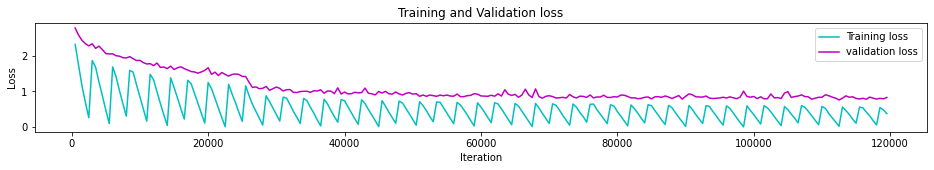

In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

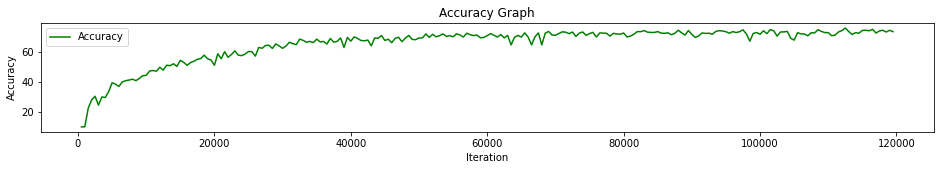

In [ ]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

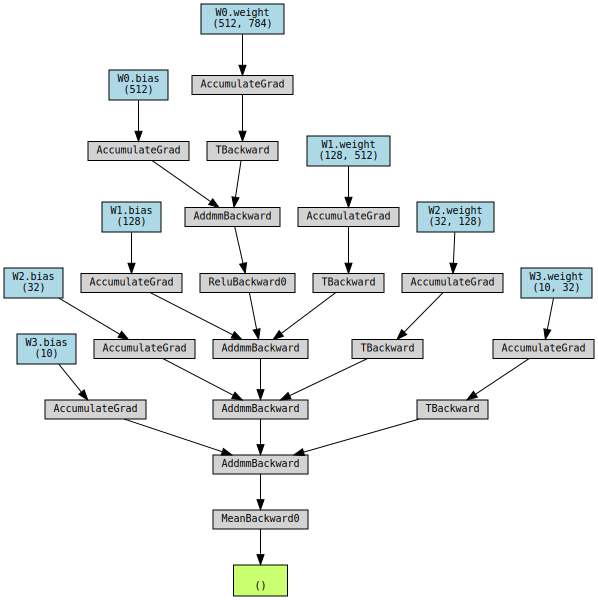

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(28*28, 512))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W1', nn.Linear(512, 128))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W2', nn.Linear(128, 32))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W3', nn.Linear(32, 10))
model1.add_module('ReLU', nn.ReLU())


xx = torch.randn(32,784)
yy = model1(xx)

make_dot(yy.mean(), params=dict(model1.named_parameters()))

# **EXP_02_trial_5**

---



In [ ]:
# Hyperparameters
batch_size = 32
num_iters = 50000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 256)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(256, 64)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(64, 32)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 2.4303727710472103. Valid_Loss: 2.9148598640733945. Accuracy: 11.566165877752624
***Validation loss decreased (9999999.000000 --> 2.914860). Saving model ...***
Iteration: 1000. Train_Loss: 1.8665500936994361. Valid_Loss: 2.8389409413232705. Accuracy: 18.93393702407903
***Validation loss decreased (2.914860 --> 2.838941). Saving model ...***
Iteration: 1500. Train_Loss: 1.304454474765839. Valid_Loss: 2.7829420606303445. Accuracy: 21.238938053097346
***Validation loss decreased (2.838941 --> 2.782942). Saving model ...***
Iteration: 2000. Train_Loss: 0.794528704304295. Valid_Loss: 2.7343853699079044. Accuracy: 27.268985387939907
***Validation loss decreased (2.782942 --> 2.734385). Saving model ...***
Iteration: 2500. Train_Loss: 0.2997646962696709. Valid_Loss: 2.6588327865047106. Accuracy: 24.819921794607943
***Validation loss decreased (2.734385 --> 2.658833). Saving model ...***
Iteration: 3000. Train_Loss: 2.17576975812716. Valid_Loss: 2.6479662294417143.

# **EXP_02_trial_6**

---



In [ ]:
# Hyperparameters
batch_size = 32
num_iters = 50000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 32)
        self.relu_4 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 2.4411039247919524. Valid_Loss: 2.939693399799486. Accuracy: 9.775674006997324
***Validation loss decreased (9999999.000000 --> 2.939693). Saving model ...***
Iteration: 1000. Train_Loss: 1.896508716532426. Valid_Loss: 2.91586999624299. Accuracy: 9.919736571310969
***Validation loss decreased (2.939693 --> 2.915870). Saving model ...***
Iteration: 1500. Train_Loss: 1.3436658721787245. Valid_Loss: 2.8617728197125647. Accuracy: 13.438979213830006
***Validation loss decreased (2.915870 --> 2.861773). Saving model ...***
Iteration: 2000. Train_Loss: 0.8272540413663063. Valid_Loss: 2.8268386726885772. Accuracy: 17.637373945256225
***Validation loss decreased (2.861773 --> 2.826839). Saving model ...***
Iteration: 2500. Train_Loss: 0.3195285892295239. Valid_Loss: 2.8216118477921253. Accuracy: 17.678534677917266
***Validation loss decreased (2.826839 --> 2.821612). Saving model ...***
Iteration: 3000. Train_Loss: 2.3325621313852274. Valid_Loss: 2.8208313790955324. 

# **EXP_02_trial_7**
learning rate change from 8
---



In [ ]:
# Hyperparameters
batch_size = 64
num_iters = 50000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 128)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(128, 32)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.8923411792955487. Valid_Loss: 2.904198958810452. Accuracy: 14.344515332372916
***Validation loss decreased (9999999.000000 --> 2.904199). Saving model ...***
Iteration: 1000. Train_Loss: 0.8252127927188195. Valid_Loss: 2.8104159548881738. Accuracy: 21.506482815394115
***Validation loss decreased (2.904199 --> 2.810416). Saving model ...***
Iteration: 1500. Train_Loss: 2.6040935593871977. Valid_Loss: 2.7691204413928032. Accuracy: 23.070590656513687
***Validation loss decreased (2.810416 --> 2.769120). Saving model ...***
Iteration: 2000. Train_Loss: 1.5875508239579683. Valid_Loss: 2.666709360307959. Accuracy: 29.080057625025727
***Validation loss decreased (2.769120 --> 2.666709). Saving model ...***
Iteration: 2500. Train_Loss: 0.587379214976929. Valid_Loss: 2.651829407965359. Accuracy: 29.22412018933937
***Validation loss decreased (2.666709 --> 2.651829). Saving model ...***
Iteration: 3000. Train_Loss: 2.2759452956014345. Valid_Loss: 2.596372493134283. 

# **EXP_02_trial_9**
layer and node increased from 7
same as 10, layer and node ta just beshi
---



In [ ]:
# Hyperparameters
batch_size = 64
num_iters = 100000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 32)
        self.relu_4 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        out  = self.linear_4(out)
        out = self.relu_4(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.6867504684061259. Valid_Loss: 2.5964481362003093. Accuracy: 13.953488372093023
***Validation loss decreased (9999999.000000 --> 2.596448). Saving model ...***
Iteration: 1000. Train_Loss: 0.69904657349468. Valid_Loss: 2.3461395353170844. Accuracy: 27.14550318995678
***Validation loss decreased (2.596448 --> 2.346140). Saving model ...***
Iteration: 1500. Train_Loss: 2.115354734890083. Valid_Loss: 2.214710106352127. Accuracy: 29.697468614941346
***Validation loss decreased (2.346140 --> 2.214710). Saving model ...***
Iteration: 2000. Train_Loss: 1.2261972922381994. Valid_Loss: 2.0636194802086205. Accuracy: 36.09796254373328
***Validation loss decreased (2.214710 --> 2.063619). Saving model ...***
Iteration: 2500. Train_Loss: 0.4569976027962774. Valid_Loss: 2.0209159752203374. Accuracy: 37.16814159292036
***Validation loss decreased (2.063619 --> 2.020916). Saving model ...***
Iteration: 3000. Train_Loss: 1.7296142538877124. Valid_Loss: 1.9667316066995524. A

# **EXP_02_trial_11**
batch size increased from trial 4 
same as trial 12, just layer and node beshi
---



In [ ]:
# Hyperparameters
batch_size = 64
num_iters = 50000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 32)
        self.relu_4 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.8068555322373636. Valid_Loss: 2.79128102477035. Accuracy: 10.2490224325993
***Validation loss decreased (9999999.000000 --> 2.791281). Saving model ...***
Iteration: 1000. Train_Loss: 0.792318933913661. Valid_Loss: 2.743421470267607. Accuracy: 13.685943609796254
***Validation loss decreased (2.791281 --> 2.743421). Saving model ...***


KeyboardInterrupt: ignored

# **EXP_02_trial_13**

---

In [ ]:
# Hyperparameters
batch_size = 64
num_iters = 100000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 700)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(700, 512)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(512, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 64)
        self.relu_4 = nn.ReLU()

        self.linear_5 = nn.Linear(64, 32)
        self.relu_5 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        out  = self.linear_4(out)
        out = self.relu_4(out)

        out  = self.linear_5(out)
        out = self.relu_5(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.6983754795650818. Valid_Loss: 2.574858857319909. Accuracy: 10.290183165260341
***Validation loss decreased (9999999.000000 --> 2.574859). Saving model ...***
Iteration: 1000. Train_Loss: 0.7216710129345424. Valid_Loss: 2.4736685764644832. Accuracy: 18.851615558756947
***Validation loss decreased (2.574859 --> 2.473669). Saving model ...***
Iteration: 1500. Train_Loss: 2.3285040394981076. Valid_Loss: 2.4325712700149213. Accuracy: 22.329697468614942
***Validation loss decreased (2.473669 --> 2.432571). Saving model ...***
Iteration: 2000. Train_Loss: 1.3744540687230176. Valid_Loss: 2.2901045667165882. Accuracy: 28.83309322905948
***Validation loss decreased (2.432571 --> 2.290105). Saving model ...***
Iteration: 2500. Train_Loss: 0.5132399768555592. Valid_Loss: 2.312604085435885. Accuracy: 26.569252932702202
Iteration: 3000. Train_Loss: 1.9614354291627716. Valid_Loss: 2.310935345665617. Accuracy: 25.684297180489814
Iteration: 3500. Train_Loss: 1.134722108133

# **EXP_02_trial_18**
---



In [ ]:
# Hyperparameters
batch_size = 64
num_iters = 50000
input_dim = 40*40
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 32)
        self.relu_4 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        out  = self.linear_4(out)
        out = self.relu_4(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.8662616488950612. Valid_Loss: 2.794761006492086. Accuracy: 10.495986828565549
***Validation loss decreased (9999999.000000 --> 2.794761). Saving model ...***
Iteration: 1000. Train_Loss: 0.7704807801332253. Valid_Loss: 2.6001178666283797. Accuracy: 18.68697262811278
***Validation loss decreased (2.794761 --> 2.600118). Saving model ...***
Iteration: 1500. Train_Loss: 2.3523064819442694. Valid_Loss: 2.454368502398434. Accuracy: 26.79563696233793
***Validation loss decreased (2.600118 --> 2.454369). Saving model ...***
Iteration: 2000. Train_Loss: 1.281348602830263. Valid_Loss: 2.2160834027651677. Accuracy: 29.57398641695822
***Validation loss decreased (2.454369 --> 2.216083). Saving model ...***
Iteration: 2500. Train_Loss: 0.47541718223199314. Valid_Loss: 2.057663547475045. Accuracy: 36.36550730603005
***Validation loss decreased (2.216083 --> 2.057664). Saving model ...***
Iteration: 3000. Train_Loss: 1.7798805713678094. Valid_Loss: 1.9967160047781176. A

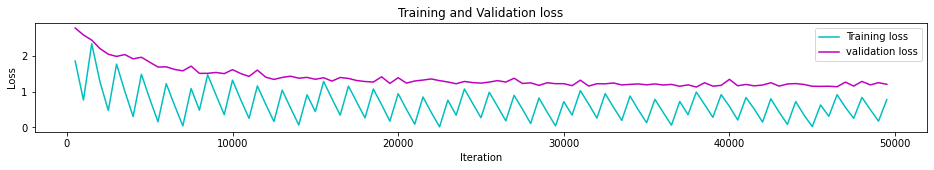

In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

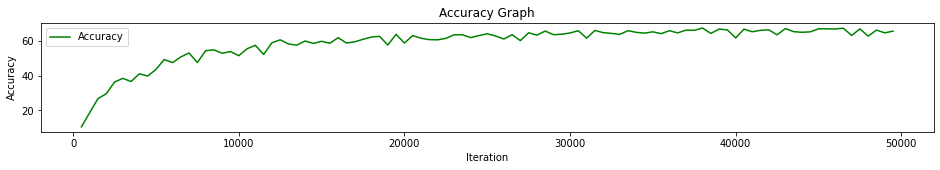

In [ ]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(40*40, 512))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W1', nn.Linear(512, 256))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W2', nn.Linear(256, 128))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W3', nn.Linear(128, 32))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W4', nn.Linear(32, 10))
model1.add_module('ReLU', nn.ReLU())


xx = torch.randn(32,1600)
yy = model1(xx)

make_dot(yy.mean(), params=dict(model1.named_parameters())).render("model1", format="png")

'model1.png'

# Trial 20

In [ ]:
# Hyperparameters
batch_size = 256
num_iters = 20000
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 700)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(700, 600)
        self.relu_2 = nn.ReLU()

        self.linear_out = nn.Linear(600, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 2.2398521163911385. Valid_Loss: 3.741686629326556. Accuracy: 29.059477258695203
***Validation loss decreased (9999999.000000 --> 3.741687). Saving model ...***
Iteration: 1000. Train_Loss: 0.48552791105449256. Valid_Loss: 3.2009522217147803. Accuracy: 30.891129862111544
***Validation loss decreased (3.741687 --> 3.200952). Saving model ...***
Iteration: 1500. Train_Loss: 2.2112147501328274. Valid_Loss: 3.1578082252270057. Accuracy: 31.199835357069357
***Validation loss decreased (3.200952 --> 3.157808). Saving model ...***
Iteration: 2000. Train_Loss: 0.912811905692969. Valid_Loss: 3.0537079715709132. Accuracy: 35.78925704877547
***Validation loss decreased (3.157808 --> 3.053708). Saving model ...***
Iteration: 2500. Train_Loss: 2.526116528587826. Valid_Loss: 3.0027987888797023. Accuracy: 36.283185840707965
***Validation loss decreased (3.053708 --> 3.002799). Saving model ...***
Iteration: 3000. Train_Loss: 1.2978693559168666. Valid_Loss: 2.998240254597056

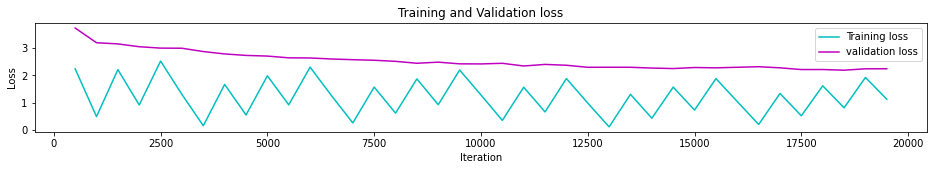

In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

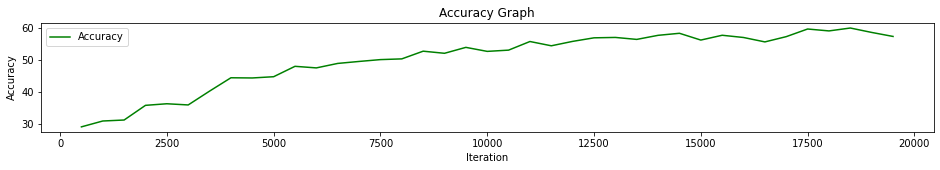

In [ ]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(28*28, 700))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W1', nn.Linear(700, 600))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W2', nn.Linear(600, 10))
model1.add_module('ReLU', nn.ReLU())

xx = torch.randn(32,784)
yy = model1(xx)

make_dot(yy.mean(), params=dict(model1.named_parameters())).render("model1", format="png")

'model1.png'

# Trial 25

In [ ]:
# Hyperparameters
batch_size = 100
num_iters = 100000
input_dim = 28*28
output_dim = 10
learning_rate = 0.05

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 32)
        self.relu_4 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)

        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.7252868325310826. Valid_Loss: 3.059249890245609. Accuracy: 10.043218769294093
***Validation loss decreased (9999999.000000 --> 3.059250). Saving model ...***
Iteration: 1000. Train_Loss: 0.35851452231523684. Valid_Loss: 2.796978187698424. Accuracy: 10.20786169993826
***Validation loss decreased (3.059250 --> 2.796978). Saving model ...***
Iteration: 1500. Train_Loss: 1.7836564337436391. Valid_Loss: 2.5376839103902853. Accuracy: 17.47273101461206
***Validation loss decreased (2.796978 --> 2.537684). Saving model ...***
Iteration: 2000. Train_Loss: 0.6456154732984049. Valid_Loss: 2.4356486361614103. Accuracy: 24.202510804692324
***Validation loss decreased (2.537684 --> 2.435649). Saving model ...***
Iteration: 2500. Train_Loss: 2.0275204691525577. Valid_Loss: 2.53426863519614. Accuracy: 17.328668450298416
Iteration: 3000. Train_Loss: 0.9410587540194848. Valid_Loss: 2.36035774308091. Accuracy: 24.531796665980654
***Validation loss decreased (2.435649 --> 2.3

In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

# Trial 28

In [12]:
# Hyperparameters
batch_size = 100
num_iters = 100000
input_dim = 28*28
output_dim = 10
learning_rate = 0.05

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(128, 32)
        self.relu_4 = nn.ReLU()

        self.linear_out = nn.Linear(32, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)

        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 1.7308364036403459. Valid_Loss: 3.038945178284913. Accuracy: 16.073266104136653
***Validation loss decreased (9999999.000000 --> 3.038945). Saving model ...***
Iteration: 1000. Train_Loss: 0.39238401741959184. Valid_Loss: 3.026258840068276. Accuracy: 10.22844206626878
***Validation loss decreased (3.038945 --> 3.026259). Saving model ...***
Iteration: 1500. Train_Loss: 2.0852413397768936. Valid_Loss: 3.0029978121129246. Accuracy: 12.903889689236468
***Validation loss decreased (3.026259 --> 3.002998). Saving model ...***
Iteration: 2000. Train_Loss: 0.653461795743892. Valid_Loss: 2.549336024973466. Accuracy: 16.402551965424983
***Validation loss decreased (3.002998 --> 2.549336). Saving model ...***
Iteration: 2500. Train_Loss: 2.0539300653557824. Valid_Loss: 2.471736590689066. Accuracy: 21.17719695410578
***Validation loss decreased (2.549336 --> 2.471737). Saving model ...***
Iteration: 3000. Train_Loss: 0.9356394318912713. Valid_Loss: 2.3792042821050794. 

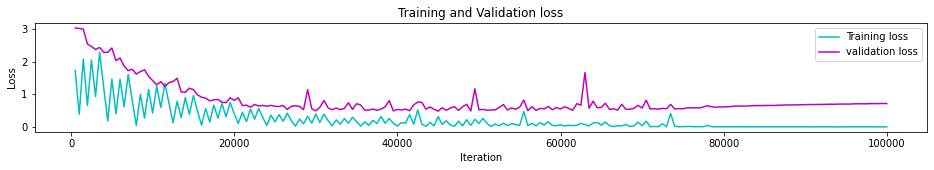

In [14]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

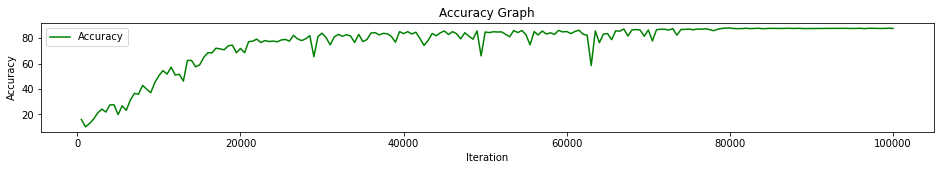

In [15]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(28*28, 512))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W1', nn.Linear(512, 256))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W2', nn.Linear(256, 128))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W3', nn.Linear(128, 10))
model1.add_module('ReLU', nn.ReLU())


xx = torch.randn(32,784)
yy = model1(xx)

make_dot(yy.mean(), params=dict(model1.named_parameters())).render("model1", format="png")

'model1.png'